## Установка PySpark

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
!pip install pyspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [ ]:
df = spark.read.csv('iris.CSV', inferSchema=True, header=True)
df.take(2)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, variety='Setosa', variety_num=0),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, variety='Setosa', variety_num=0)]

## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [ ]:
df_min = df.groupBy('variety').min('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_min.show()

+----------+----------------+----------------+-----------------+----------------+
|   variety|min(sepal_width)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+----------------+----------------+-----------------+----------------+
| Virginica|             2.2|             2.2|              4.5|             1.4|
|    Setosa|             2.3|             2.3|              1.0|             0.1|
|Versicolor|             2.0|             2.0|              3.0|             1.0|
+----------+----------------+----------------+-----------------+----------------+



In [ ]:
df_max = df.groupBy('variety').max('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_max.show()

+----------+----------------+----------------+-----------------+----------------+
|   variety|max(sepal_width)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+----------------+----------------+-----------------+----------------+
| Virginica|             3.8|             3.8|              6.9|             2.5|
|    Setosa|             4.4|             4.4|              1.9|             0.6|
|Versicolor|             3.4|             3.4|              5.1|             1.8|
+----------+----------------+----------------+-----------------+----------------+



In [ ]:
df_avg = df.groupBy('variety').avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [ ]:
import matplotlib.pyplot as plt

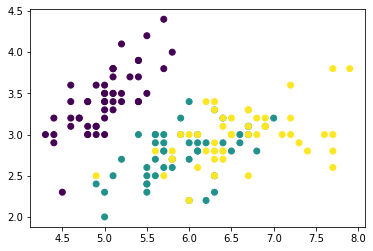

In [ ]:
plt.scatter(df[['sepal_length']].collect(), df[['sepal_width']].collect(), c=df[['variety_num']].collect())

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

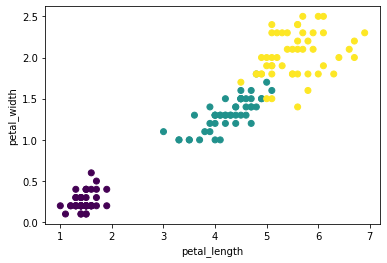

In [ ]:
plt.scatter(df[['petal_length']].collect(), df[['petal_width']].collect(), c=df[['variety_num']].collect())
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [ ]:
from pyspark.sql.functions import when

In [ ]:

df_predict_class = df.withColumn('predict_class', when(df['petal_length'] <= 1.5 , "Setosa")
                            .when(df['petal_length'] > 1.5,"unknwown")
                            .otherwise(df['petal_length']))
df_predict_class.show()

+------------+-----------+------------+-----------+-------+-----------+-------------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|predict_class|
+------------+-----------+------------+-----------+-------+-----------+-------------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|       Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|       Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|       Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|       Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|       Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|     unknwown|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|       Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|          0|       Setosa|
|         4.4|        2.9|         1.4|        0.2| Se

## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [ ]:
df_predict_class.where((df_predict_class['predict_class']=='Setosa') & (df_predict_class['variety']=='Setosa')).count()

37

In [ ]:
df_predict_class.where((df_predict_class['predict_class']!='Setosa') & (df_predict_class['variety']=='Setosa')).count()

13